In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from tqdm import tqdm_notebook

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import torch

In [ ]:
from wordcloud import WordCloud

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from googletrans import Translator

translator = Translator()

def translate_to_korean(word):
    translation = translator.translate(word, dest='ko')
    return translation.text

In [ ]:
df = pd.read_pickle('../dataset/Antman_Quantumania.p')
df.head()

,review,label
0,"Another serving of bland, bombastic superhero ...",0
1,What the hell did I just watch? And the answer...,0
2,"As the years go by, it's obvious that moviegoe...",0
3,So bad I created an account just to leave this...,0
4,Don't bother going unless you have extra money...,0


In [ ]:
bad_reviews = df['review'][df['label']=='0'].to_list()
good_reviews = df['review'][df['label']=='1'].to_list()

In [ ]:
def remove_stopwords(sentence):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(sentence)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_sentence = ' '.join(filtered_tokens)
    return filtered_sentence

for i in tqdm_notebook(range(len(bad_reviews))):
    bad_reviews[i] = remove_stopwords(bad_reviews[i])

for i in tqdm_notebook(range(len(good_reviews))):
    good_reviews[i] = remove_stopwords(good_reviews[i])

/tmp/ipykernel_19552/161755455.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(bad_reviews))):


  0%|          | 0/75 [00:00<?, ?it/s]

/tmp/ipykernel_19552/161755455.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(good_reviews))):


  0%|          | 0/73 [00:00<?, ?it/s]

In [ ]:
bad_review_data = ''
for br in bad_reviews:
    bad_review_data = bad_review_data + ' ' + br

good_review_data = ''
for gr in good_reviews:
    good_review_data = good_review_data + ' ' + gr

In [ ]:
docs = [bad_review_data, good_review_data]

In [ ]:
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_tfidf_weights(corpus):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()

    weights = []
    for row in tfidf_matrix:
        row_weights = {}
        for col, value in zip(row.indices, row.data):
            feature_name = feature_names[col]
            row_weights[feature_name] = value
        weights.append(row_weights)

    return weights

In [ ]:
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

weights = calculate_tfidf_weights(docs)

bad_word_score = {

}

good_word_score = {

}
for i, doc_weights in enumerate(weights):
    if i==0:
        for feature_name, weight in doc_weights.items():
            bad_word_score.setdefault(feature_name, weight)

    if i==1:
        for feature_name, weight in doc_weights.items():
            good_word_score.setdefault(feature_name, weight)
#     print(f"Document {i+1}:")
#     for feature_name, weight in doc_weights.items():
#         print(f"  {feature_name}: {weight}")

In [ ]:
bad_word_score = dict(sorted(bad_word_score.items(), key=lambda x: x[1])[::-1])

bad_word_score

{'movie': 0.4653852381646873,
 'marvel': 0.25828880718140146,
 'like': 0.24200032384563738,
 'bad': 0.16986561193011085,
 'man': 0.1535771285943468,
 'kang': 0.1535771285943468,
 'even': 0.14892327621269993,
 'time': 0.13030786668611244,
 'movies': 0.13030786668611244,
 'film': 0.127980940495289,
 'one': 0.12565401430446557,
 'character': 0.12100016192281869,
 'good': 0.11634630954117182,
 'ant': 0.11401938335034839,
 'characters': 0.11169245715952494,
 'mcu': 0.10005782620540776,
 'could': 0.10005782620540776,
 'cgi': 0.0954039738237609,
 'much': 0.0954039738237609,
 'quantum': 0.09075012144211402,
 'would': 0.08609626906046715,
 'plot': 0.07911549048799683,
 'made': 0.0767885642971734,
 'story': 0.0767885642971734,
 'really': 0.07446163810634997,
 'first': 0.07446163810634997,
 'the': 0.07213471191552653,
 'realm': 0.07213471191552653,
 'back': 0.07213471191552653,
 'end': 0.07213471191552653,
 'felt': 0.06748085953387965,
 'make': 0.06748085953387965,
 'new': 0.06748085953387965,
 '

In [ ]:
good_word_score = dict(sorted(good_word_score.items(), key=lambda x: x[1])[::-1])

good_word_score

{'movie': 0.5220053194622406,
 'kang': 0.25431028384057874,
 'good': 0.19541737600381315,
 'like': 0.17667872351029681,
 'marvel': 0.1740017731540802,
 'really': 0.1740017731540802,
 'great': 0.15794007101678048,
 'man': 0.14723226959191402,
 'ant': 0.14187836887948077,
 'film': 0.13920141852326415,
 'mcu': 0.12313971638596444,
 'movies': 0.12046276602974783,
 'action': 0.11510886531731458,
 'see': 0.11510886531731458,
 'much': 0.11510886531731458,
 'character': 0.08566241139893178,
 'well': 0.08566241139893178,
 'would': 0.08298546104271518,
 'story': 0.08298546104271518,
 'watch': 0.08030851068649855,
 'majors': 0.08030851068649855,
 'one': 0.07763156033028193,
 'could': 0.07763156033028193,
 'the': 0.07495460997406532,
 'lot': 0.0722776596178487,
 'time': 0.06960070926163207,
 'people': 0.06960070926163207,
 'characters': 0.06960070926163207,
 'think': 0.06960070926163207,
 'scenes': 0.06960070926163207,
 'even': 0.06692375890541546,
 'funny': 0.06692375890541546,
 'say': 0.06424680

In [ ]:
bad = list(bad_word_score.keys())[:200]
good = list(good_word_score.keys())[:200]

In [ ]:
set(good)-set(bad)

{'3d',
 'action',
 'add',
 'addition',
 'always',
 'amazing',
 'awesome',
 'balance',
 'bit',
 'cast',
 'comedy',
 'comic',
 'comics',
 'coming',
 'conqueror',
 'cool',
 'credit',
 'critics',
 'deeper',
 'definitely',
 'design',
 'dynasty',
 'edge',
 'endgame',
 'enjoy',
 'enjoyable',
 'enjoyed',
 'entertaining',
 'especially',
 'excellent',
 'excited',
 'expectations',
 'family',
 'far',
 'finally',
 'flaws',
 'future',
 'gave',
 'hai',
 'hero',
 'however',
 'interesting',
 'intriguing',
 'job',
 'kathryn',
 'lang',
 'less',
 'level',
 'liked',
 'loki',
 'look',
 'loved',
 'making',
 'may',
 'maybe',
 'might',
 'moments',
 'must',
 'needed',
 'newton',
 'opinion',
 'overall',
 'played',
 'pleasantly',
 'post',
 'previous',
 'quite',
 'read',
 'recommend',
 'reviews',
 'right',
 'role',
 'scenes',
 'season',
 'several',
 'show',
 'sometimes',
 'strong',
 'superhero',
 'sure',
 'terms',
 'times',
 'totally',
 'truly',
 'wow'}

In [ ]:
list(set(bad)-set(good))

['let',
 'annoying',
 'mess',
 'probably',
 'murray',
 'entire',
 'quality',
 'seems',
 'sad',
 'beginning',
 'sense',
 'awful',
 'real',
 'multiverse',
 'used',
 'boring',
 'point',
 'care',
 'someone',
 'reason',
 'thanos',
 'act',
 'daughter',
 'girl',
 'cringe',
 'writing',
 'got',
 'completely',
 'actually',
 'become',
 'basically',
 'iron',
 'madness',
 'kids',
 'trying',
 'thunder',
 'there',
 'years',
 'michael',
 'guy',
 'universe',
 'want',
 'makes',
 'writers',
 'nothing',
 'looks',
 'wanted',
 'looked',
 'minutes',
 'worst',
 'trash',
 'enough',
 'feels',
 'written',
 'hours',
 'ever',
 'anything',
 'dialogue',
 'something',
 'literally',
 'terrible',
 'script',
 'since',
 'check',
 'hollywood',
 'screen',
 'pathetic',
 'storyline',
 'joke',
 'keep',
 'take',
 'honestly',
 'set',
 'worse',
 'remember',
 'old',
 'money',
 'hank',
 'bill',
 'waste',
 'saw',
 'powerful',
 'instead',
 'janet',
 'disney']

In [ ]:
list(set(bad)-set(good))

['let',
 'annoying',
 'mess',
 'probably',
 'murray',
 'entire',
 'quality',
 'seems',
 'sad',
 'beginning',
 'sense',
 'awful',
 'real',
 'multiverse',
 'used',
 'boring',
 'point',
 'care',
 'someone',
 'reason',
 'thanos',
 'act',
 'daughter',
 'girl',
 'cringe',
 'writing',
 'got',
 'completely',
 'actually',
 'become',
 'basically',
 'iron',
 'madness',
 'kids',
 'trying',
 'thunder',
 'there',
 'years',
 'michael',
 'guy',
 'universe',
 'want',
 'makes',
 'writers',
 'nothing',
 'looks',
 'wanted',
 'looked',
 'minutes',
 'worst',
 'trash',
 'enough',
 'feels',
 'written',
 'hours',
 'ever',
 'anything',
 'dialogue',
 'something',
 'literally',
 'terrible',
 'script',
 'since',
 'check',
 'hollywood',
 'screen',
 'pathetic',
 'storyline',
 'joke',
 'keep',
 'take',
 'honestly',
 'set',
 'worse',
 'remember',
 'old',
 'money',
 'hank',
 'bill',
 'waste',
 'saw',
 'powerful',
 'instead',
 'janet',
 'disney']

In [ ]:
bad

['movie',
 'marvel',
 'like',
 'bad',
 'man',
 'kang',
 'even',
 'time',
 'movies',
 'film',
 'one',
 'character',
 'good',
 'ant',
 'characters',
 'mcu',
 'could',
 'cgi',
 'much',
 'quantum',
 'would',
 'plot',
 'made',
 'story',
 'really',
 'first',
 'the',
 'realm',
 'back',
 'end',
 'felt',
 'make',
 'new',
 'get',
 'also',
 'worst',
 'many',
 'rudd',
 'villain',
 'way',
 'paul',
 've',
 'whole',
 'multiverse',
 'another',
 'years',
 'terrible',
 'disney',
 'watching',
 'something',
 'written',
 'writing',
 'cassie',
 'think',
 'scott',
 'janet',
 'never',
 'big',
 'watch',
 'nothing',
 'two',
 'know',
 'annoying',
 'basically',
 'iron',
 'say',
 'modok',
 'going',
 'great',
 'every',
 'since',
 'sense',
 'people',
 'guy',
 'scene',
 'world',
 'hours',
 'seen',
 'phase',
 '10',
 'makes',
 'acting',
 'majors',
 'films',
 'well',
 'it',
 'quantumania',
 'things',
 'point',
 'done',
 'go',
 'actually',
 'hank',
 'trying',
 'daughter',
 'come',
 'looks',
 'hope',
 'dialogue',
 'thor',

In [ ]:
set(bad)-set(good)

{'act',
 'actually',
 'annoying',
 'anything',
 'awful',
 'basically',
 'become',
 'beginning',
 'bill',
 'boring',
 'care',
 'check',
 'completely',
 'cringe',
 'daughter',
 'dialogue',
 'disney',
 'enough',
 'entire',
 'ever',
 'feels',
 'girl',
 'got',
 'guy',
 'hank',
 'hollywood',
 'honestly',
 'hours',
 'instead',
 'iron',
 'janet',
 'joke',
 'keep',
 'kids',
 'let',
 'literally',
 'looked',
 'looks',
 'madness',
 'makes',
 'mess',
 'michael',
 'minutes',
 'money',
 'multiverse',
 'murray',
 'nothing',
 'old',
 'pathetic',
 'point',
 'powerful',
 'probably',
 'quality',
 'real',
 'reason',
 'remember',
 'sad',
 'saw',
 'screen',
 'script',
 'seems',
 'sense',
 'set',
 'since',
 'someone',
 'something',
 'storyline',
 'take',
 'terrible',
 'thanos',
 'there',
 'thunder',
 'trash',
 'trying',
 'universe',
 'used',
 'want',
 'wanted',
 'waste',
 'worse',
 'worst',
 'writers',
 'writing',
 'written',
 'years'}

In [ ]:
bc = list(set(bad)-set(good))
gc = list(set(good)-set(bad))

real_bad = [(x, bad_word_score[x]) for x in bad if x in bc]
real_good = [(x, good_word_score[x]) for x in good if x in gc]

In [ ]:
dict(real_bad)

{'worst': 0.06282700715223279,
 'multiverse': 0.05351930238893904,
 'years': 0.0511923761981156,
 'terrible': 0.0511923761981156,
 'disney': 0.0511923761981156,
 'something': 0.0511923761981156,
 'written': 0.04905620355518071,
 'writing': 0.048865450007292165,
 'janet': 0.048865450007292165,
 'nothing': 0.04421159762564529,
 'annoying': 0.042515376414489936,
 'basically': 0.042515376414489936,
 'iron': 0.042515376414489936,
 'since': 0.03955774524399842,
 'sense': 0.03955774524399842,
 'guy': 0.03955774524399842,
 'hours': 0.037230819053174984,
 'makes': 0.037230819053174984,
 'point': 0.03490389286235154,
 'actually': 0.03490389286235154,
 'hank': 0.03490389286235154,
 'trying': 0.03490389286235154,
 'daughter': 0.03490389286235154,
 'looks': 0.03490389286235154,
 'dialogue': 0.03490389286235154,
 'bill': 0.03490389286235154,
 'murray': 0.03490389286235154,
 'madness': 0.032704135703453804,
 'script': 0.03257696667152811,
 'entire': 0.03257696667152811,
 'used': 0.03257696667152811,


In [ ]:
cloud = WordCloud(background_color ='white', colormap='autumn',
                      width = 4000, height = 3000, random_state = 43).generate_from_frequencies(dict(real_good))#.generate_from_frequencies(dic)

# 생성된 WordCloud를 test.jpg로 보낸다.
cloud.to_file('존윅good.jpg')

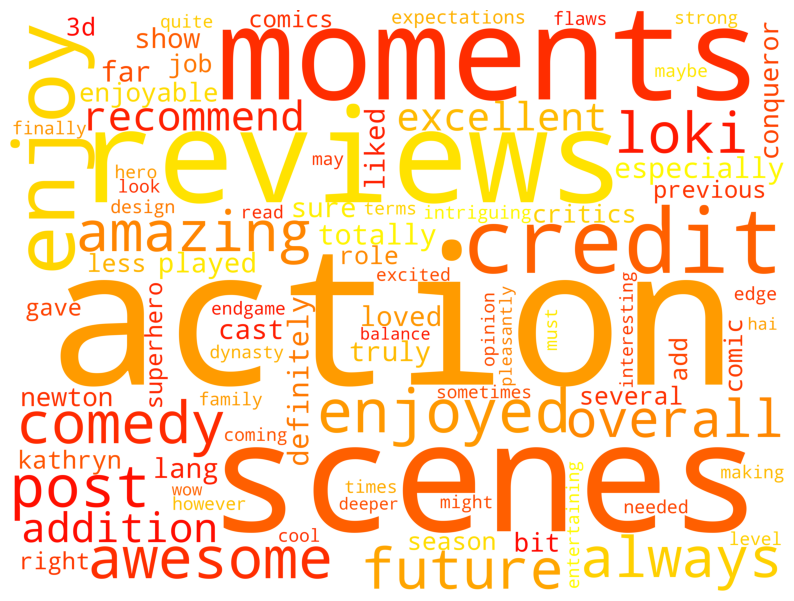

In [ ]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
cloud = WordCloud(background_color ='white', colormap='autumn',
                      width = 4000, height = 3000, random_state = 43).generate_from_frequencies(dict(real_bad))#.generate_from_frequencies(dic)

# 생성된 WordCloud를 test.jpg로 보낸다.
cloud.to_file('앤트맨bad.jpg')

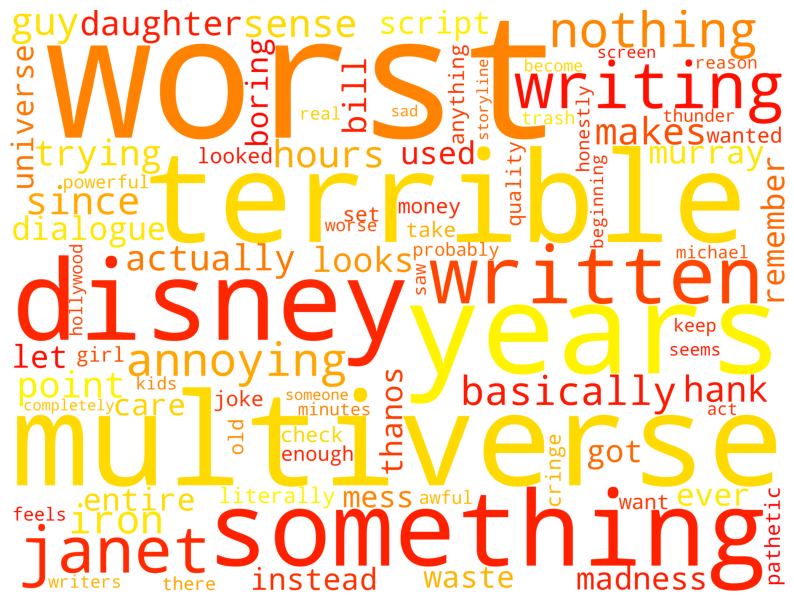

In [ ]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
kor_real_good = []

for i in tqdm_notebook(range(len(real_good))):
    kor_real_good.append((translate_to_korean(real_good[i][0]), real_good[i][1]))

kor_real_good[:10]

/tmp/ipykernel_19552/2540777558.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(real_good))):


  0%|          | 0/85 [00:00<?, ?it/s]

[('행동', 0.11510886531731458),
 ('장면', 0.06960070926163207),
 ('리뷰', 0.04818510641189913),
 ('순간', 0.04818510641189913),
 ('신용 거래', 0.04818510641189913),
 ('즐기다', 0.04283120569946589),
 ('즐겼다', 0.04283120569946589),
 ('엄청난', 0.040154255343249276),
 ('우편', 0.040154255343249276),
 ('코메디', 0.040154255343249276)]

In [ ]:
kor_real_bad = []

for i in tqdm_notebook(range(len(real_bad))):
    kor_real_bad.append((translate_to_korean(real_bad[i][0]), real_bad[i][1]))

kor_real_bad[:10]

/tmp/ipykernel_19552/2172110793.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(real_bad))):


  0%|          | 0/85 [00:00<?, ?it/s]

[('최악의', 0.06282700715223279),
 ('다중 우주', 0.05351930238893904),
 ('연령', 0.0511923761981156),
 ('끔찍한', 0.0511923761981156),
 ('디즈니', 0.0511923761981156),
 ('무엇', 0.0511923761981156),
 ('쓴', 0.04905620355518071),
 ('글쓰기', 0.048865450007292165),
 ('자넷', 0.048865450007292165),
 ('아무것도 아님', 0.04421159762564529)]

In [ ]:
import pickle
# save
with open('ant_kor_real_good.pickle', 'wb') as f:
    pickle.dump(kor_real_good, f, pickle.HIGHEST_PROTOCOL)

# save
with open('ant_kor_real_bad.pickle', 'wb') as f:
    pickle.dump(kor_real_bad, f, pickle.HIGHEST_PROTOCOL)